<center>
<img src="logo.png" height="900"> 
</center>


#  Аварии на шахтах

In [20]:
import numpy as np

import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии 
* насколько большой у среднего числа аварий доверительный интервал

In [21]:
import pandas as pd

df = pd.read_csv("coals.csv", index_col=0)
df.head()

,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0


В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии. Посмотрим на распределение числа аварий. 

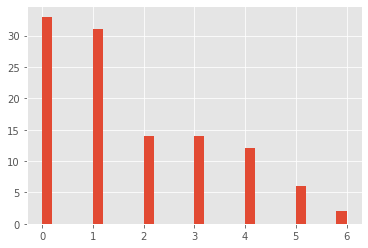

In [22]:
df['count'].hist(bins=30);

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$. 

__а) Метод моментов__

Найдите оценку параметра $\lambda$ с помощью метода моментов. Запишите получившийся результат в переменную `lambda_hat`.

In [23]:
n_hat = df.shape[0]   # число наблюдений 
lam_hat = df['count'].mean()         # ваша оценка метода моментов

# your code here


In [24]:
# проверка, что оценка была найдена корректно 
# похожие тесты, но для lam_hat скрыты от вас
# они запустятся после того как вы сдадите тетрадку на проверку в грейдер

assert n_hat == 112 


__б) Стандартное отклонение__ 

Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение. Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`. 

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона. Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт. Конечно же вы можете оценить его через функцию `std`, в плане асимптотики результат получится одинаковый. Оба способа корректны. Но с точки зрения грейдера, у вас будет ошибка. 

In [25]:
lam_se = np.sqrt(df['count'].mean())         # ваша оценка

# your code here


In [26]:
# проверка, что оценка была найдена корректно 
assert lam_se < 1.6474

# несколько похожих тестов скрыты от вас


__в) Доверительный интервал__ 

Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала. В переменную `delta` запишите его ширину.

In [27]:
alpha = .1

coef = sts.norm().isf(alpha/2)

left = lam_hat - coef * lam_se / np.sqrt(n_hat)
right = lam_hat + coef *  lam_se / np.sqrt(n_hat)
delta = right - left

# your code here


In [28]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 1.502389916114217) < 1e-5

# несколько похожих тестов скрыты от вас


__г) Число катастроф__  

Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал. 

In [29]:
x = df[df.year <= 1900]['count']
y = df[df.year > 1900]['count']

alpha = 0.05
coef = sts.norm().isf(alpha/2)

lam_hat1, lam_hat2 = [np.mean(i) for i in [x, y]] 
lam_se1, lam_se2 = [np.sqrt(np.mean(i)) for i in [x, y]] 
n_hat1, n_hat2 = [i.shape[0] for i in [x, y]] 

left = (lam_hat1 - lam_hat2) - coef * np.sqrt(lam_se1**2 / n_hat1 + lam_se2**2 / n_hat2)
right = (lam_hat1 - lam_hat2) + coef * np.sqrt(lam_se1**2 / n_hat1 + lam_se2**2 / n_hat2)
delta = right - left

# your code here


In [30]:
# проверка, что границы доверительного интервала найдены верно
assert x.size == 50
assert np.abs(left - 1.2835473859716393) < 1e-5

# несколько похожих тестов скрыты от вас


Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось. 

__д) Вероятность для распределения Пуассона__ 

Вспомните формулу, по которой считается вероятность того, что Пуассоновская случайная величина примет какое-то значение. Найдите точечную оценку вероятности того, что произойдёт только одна авария. В качестве $\lambda$ используйте оценку метода моментов, полученную в первом задании. 

In [31]:
from math import factorial, exp 

In [32]:
def poiss_prob(k):
    return lam_hat**k * exp(-lam_hat)/ factorial(k) 
# your code here


In [33]:
# проверка,функции
assert np.abs(poiss_prob(1) - 0.3098761) < 1e-5

# похожие тесты скрыты от вас


__е) Дельта-метод__ 

Та вероятность, которую мы нашли в предыдущем пункте - это лишь точечная оценка. Она является функцией от среднего. С помощью дельта-метода постройте для этой вероятности $95\%$ довертельный интервал.

In [111]:
# другой метод
loc =  lam_hat*exp(-lam_hat)
m = exp(-lam_hat)- loc
scale = np.sqrt(lam_hat/n_hat * m **2)
left, right = sts.norm.interval(0.95, loc=loc, scale=scale)
left

0.27887850777625484

In [96]:
# alpha = 0.05

# coef = sts.norm().isf(alpha/2)

# left = loc-coef*scale
# right = loc+coef*scale
delta = right - left
# your code here


In [112]:
# проверка, что интервал построен корректно
assert np.abs(left - 0.279) < 1e-3

# похожие тесты скрыты от вас


По аналогии можно построить доверительные интервалы для вероятности того, что случайная величина примет значения от нуля до девяти. Проделайте это в качестве необязательного упражнения и оформите процедуру расчёта в виде функции.

In [117]:
def prob_ci(k, alpha = 0.01, lam_hat=lam_hat):
    
    def g_t():
#   просто функции пуасона 
        return lam_hat**k * exp(-lam_hat) / factorial(k)
    
    def diff_g_t():
#   просто производная от функции пуасона
        return exp(-lam_hat) * lam_hat**(k - 1 )* (k - lam_hat) / factorial(k)
    
    loc =  g_t()
    scale = np.sqrt(lam_hat* diff_g_t()**2 /n_hat) 
    left, right = sts.norm.interval(1 - alpha, loc=loc, scale=scale)
    return left, right
# your code here


In [118]:
left, right = prob_ci(1)
delta = right - left

assert np.abs(delta - 0.08147) < 1e-5

left, right = prob_ci(0)
delta = right - left

assert np.abs(delta - 0.11551) < 1e-5

Сделали функцию? Запускайте код для не очень информативной картинки!

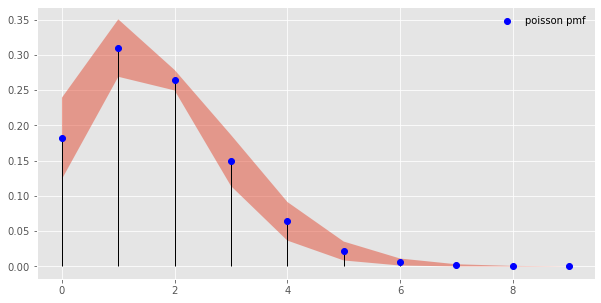

In [119]:
poiss_rv = sts.poisson(lam_hat)

x = np.arange(10)
f = np.vectorize(prob_ci)
p = poiss_rv.pmf(x)
left, right = f(x)

plt.figure(figsize=(10,5))
plt.plot(x, p, 'bo', ms=6, label='poisson pmf')
plt.fill_between(x, left, right, alpha=0.5)
plt.vlines(x, 0, p, lw=1)
plt.legend(loc='best', frameon=False)
plt.show()

In [40]:
for k,(i,j) in enumerate(zip(left, right)):
    print(f"Вероятность P(X={k}) лежит между  {i:.5} и {j:.5}")

Вероятность P(X=0) лежит между  0.17128 и 0.19214
Вероятность P(X=1) лежит между  0.27955 и 0.3402
Вероятность P(X=2) лежит между  0.24218 и 0.28627
Вероятность P(X=3) лежит между  0.14307 и 0.15732
Вероятность P(X=4) лежит между  0.062741 и 0.065331
Вероятность P(X=5) лежит между  0.02169 и 0.021991
Вероятность P(X=6) лежит между  0.0061956 и 0.0062199
Вероятность P(X=7) лежит между  0.0015116 и 0.0015131
Вероятность P(X=8) лежит между  0.00032235 и 0.00032242
Вероятность P(X=9) лежит между  6.1086e-05 и 6.1088e-05


Интервалы получился довольно короткими. Попробуйте поиграться с уровнем значимости и посмотреть как они меняются в зависимости от него. 

В этой терадке нам осталось обсудить последний нюанс. Мы из теории вероятностей знаем, что для случайной величины $X$, имеющей распределение Пуассона $\mathbb{E}(X) = Var(X) = \lambda$. Для текущей выборки мы видим, что между дисперсией и средним есть небольшое отличие. 

In [41]:
df['count'].mean()

1.7053571428571428

In [42]:
df['count'].var()

2.7142052767052722

Не факт, что мы имеем право предполагать, что наша выборка пришла к нам из распределения Пуассона. Все предпосылки о распределениях выборки нужно тестировать. Позже мы научимся это делать.